In [3]:
!pip install ultralytics
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import os
import yaml
import random
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\oemer\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
root_dir = "./BoneFracturesDetection"

for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = '  ' * level
    print(f"{indent}{os.path.basename(root)}/")

BoneFracturesDetection/
  test/
    images/
    labels/
  train/
    images/
    labels/
  valid/
    images/
    labels/


In [11]:
yaml_path="./BoneFracturesDetection/data.yaml"

with open(yaml_path,"r") as file:
    data=yaml.safe_load(file)
print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 10, 'names': ['Comminuted', 'Greenstick', 'Healthy', 'Linear', 'Oblique Displaced', 'Oblique', 'Segmental', 'Spiral', 'Transverse Displaced', 'Transverse'], 'roboflow': {'workspace': 'iubat-i4ldm', 'project': 'bon-fracture-detection', 'version': 2, 'license': 'Private', 'url': 'https://app.roboflow.com/iubat-i4ldm/bon-fracture-detection/2'}}


In [12]:
data['names']

['Comminuted',
 'Greenstick',
 'Healthy',
 'Linear',
 'Oblique Displaced',
 'Oblique',
 'Segmental',
 'Spiral',
 'Transverse Displaced',
 'Transverse']

In [13]:
class_img={}
j=0

for i in data['names']:
    class_img[j]=i
    j=j+1

class_img

{0: 'Comminuted',
 1: 'Greenstick',
 2: 'Healthy',
 3: 'Linear',
 4: 'Oblique Displaced',
 5: 'Oblique',
 6: 'Segmental',
 7: 'Spiral',
 8: 'Transverse Displaced',
 9: 'Transverse'}

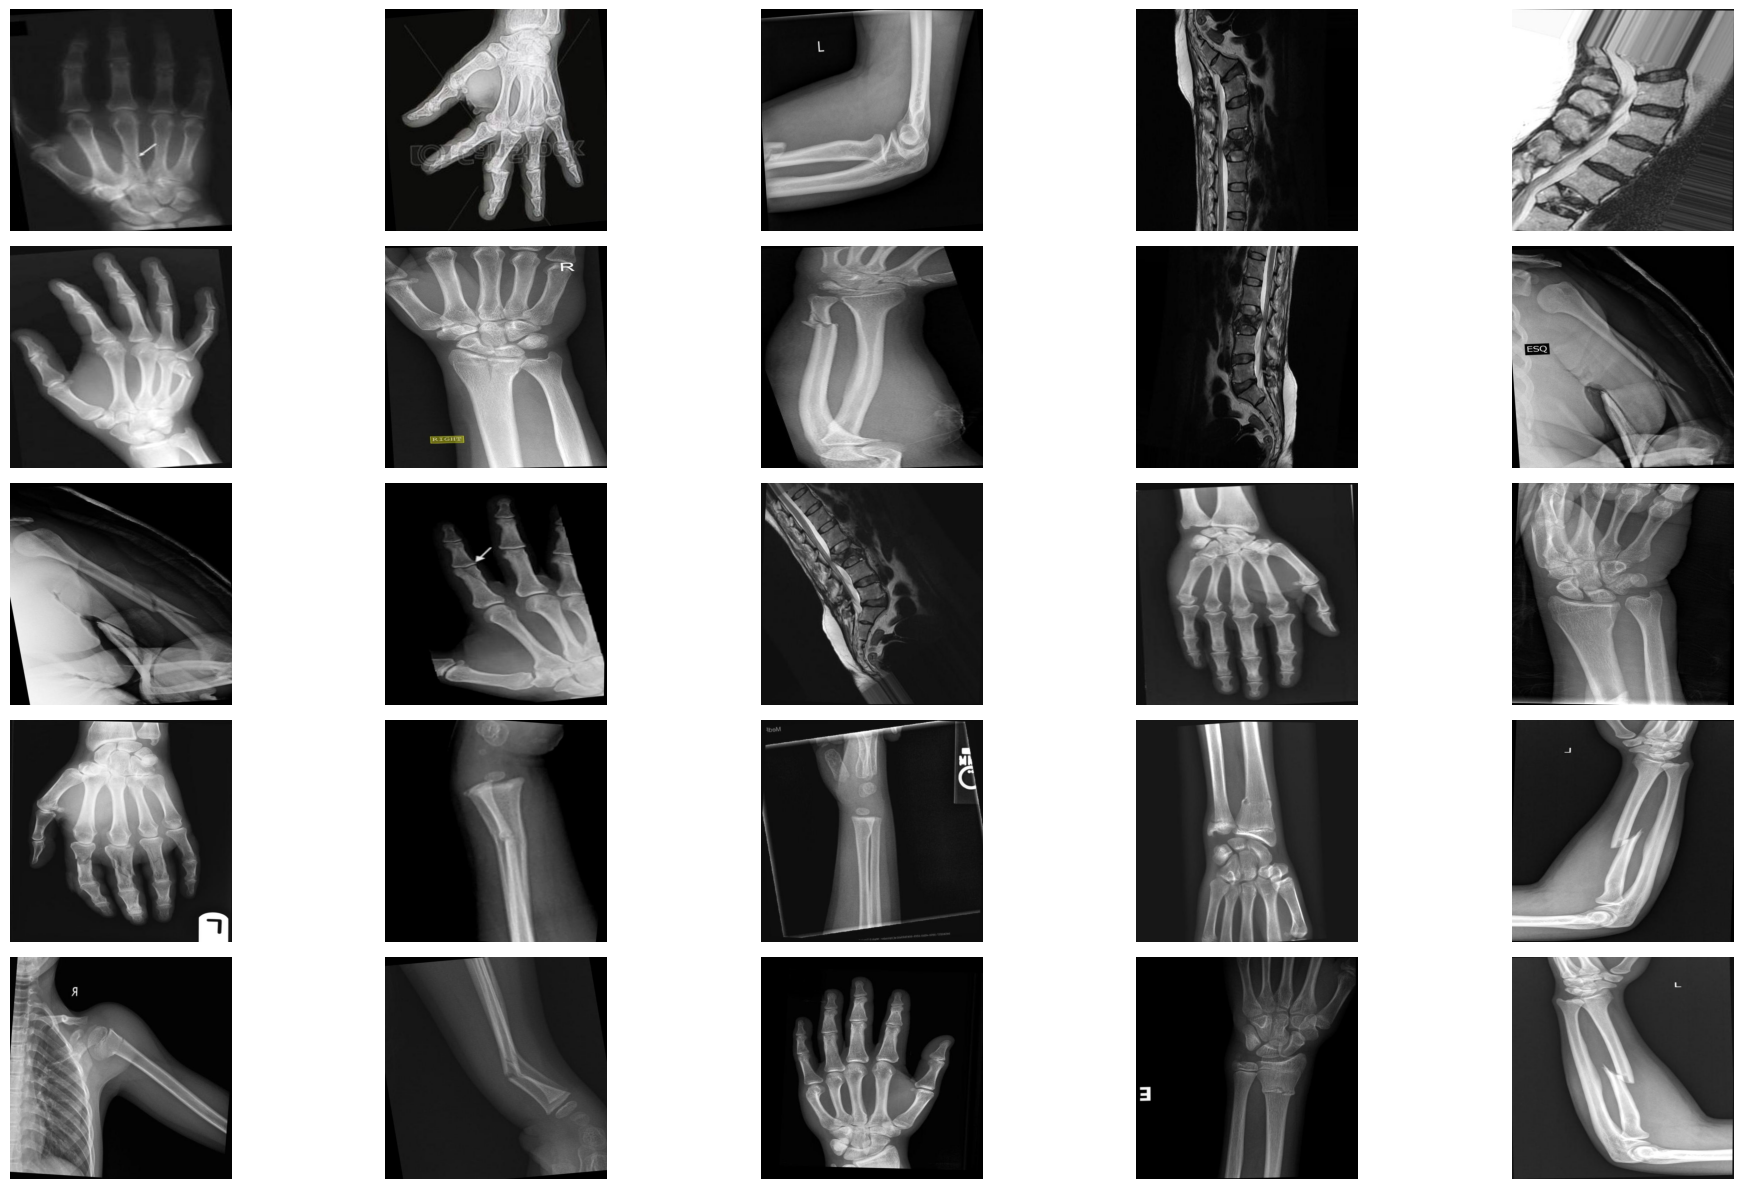

In [14]:
train_images_dir = "./BoneFracturesDetection/train/images"

image_files = [f for f in os.listdir(train_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sample_files = random.sample(image_files, min(25, len(image_files)))

plt.figure(figsize=(20,12))

for i, img_name in enumerate(sample_files, 1):
    img_path = os.path.join(train_images_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(5,5,i)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()